 **Q7. Use a CNN-Based Auto-Encoder Network to Remove the Gaussian Blurring effect from images corrupted with Gaussian Filtering. Train Your Network on the MNIST Dataset** By Sudipta Sarkar (Roll :- CSPG/078/23)

In [ ]:
#Step 1: Load all Library

In [ ]:
import tensorflow as tf
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import cv2
import matplotlib.pyplot as plt
import keras
from keras import layers

In [ ]:
# Define the Gaussian Bluring Function that can take images and bluring them and return

In [ ]:
def apply_gaussian_blur(image):
    kernel_size=(7, 7)
    sigma=0.50
    blurred_image = cv2.GaussianBlur(image, kernel_size, sigma)
    return blurred_image

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

In [ ]:
x_train_noisy = apply_gaussian_blur(x_train)
x_test_noisy = apply_gaussian_blur(x_test)

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


Text(0.5, 1.0, 'Original Image')

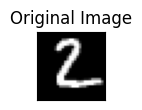

In [ ]:
plt.figure(figsize=(3,3))
plt.subplot(1,3,1)
plt.imshow(x_test[1].reshape(28,-1),cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Original Image')

In [ ]:
x_train_noisy = x_train_noisy.astype('float32') / 255
x_test_noisy = x_test_noisy.astype('float32') / 255
x_train_noisy = np.reshape(x_train_noisy, (len(x_train), 28, 28, 1))
x_test_noisy =  np.reshape(x_test_noisy, (len(x_test), 28, 28, 1))
print(x_train_noisy.shape)
print(x_test_noisy.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


Text(0.5, 1.0, 'Noise Image')

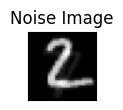

In [ ]:
plt.figure(figsize=(3,3))
plt.subplot(1,3,1)
plt.imshow(x_test_noisy[1].reshape(28,-1),cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Noise Image')

In [ ]:
print(cv2.PSNR(x_test[1],x_test_noisy[1]))

69.4311831021074


In [ ]:
# Define AutoEncoder Model

In [ ]:

input_img = keras.Input(shape=(28, 28, 1))

# Encoder Block

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder Block
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [ ]:
autoencoder = keras.Model(input_img, decoded)

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 14, 14, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 7, 7, 8)             │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_3 (UpSampling2D)       │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 16)            │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_4 (UpSampling2D)       │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 14, 14, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_5 (UpSampling2D)       │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,785 (49.94 KB)

 Trainable params: 12,785 (49.94 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=30,
                batch_size=128,
                validation_data=(x_test_noisy, x_test)
                )

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8129 - loss: 0.0988 - val_accuracy: 0.8130 - val_loss: 0.0881
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8136 - loss: 0.0890 - val_accuracy: 0.8125 - val_loss: 0.0889
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8138 - loss: 0.0891 - val_accuracy: 0.8128 - val_loss: 0.0881
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8140 - loss: 0.0888 - val_accuracy: 0.8126 - val_loss: 0.0881
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8140 - loss: 0.0887 - val_accuracy: 0.8130 - val_loss: 0.0880
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8134 - loss: 0.0888 - val_accuracy: 0.8127 - val_loss: 0.0878
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8138 - loss: 0.0884 - val_accuracy: 0.8131 - val_loss: 0.0871
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8136 - loss: 0.0885 - val_accuracy: 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


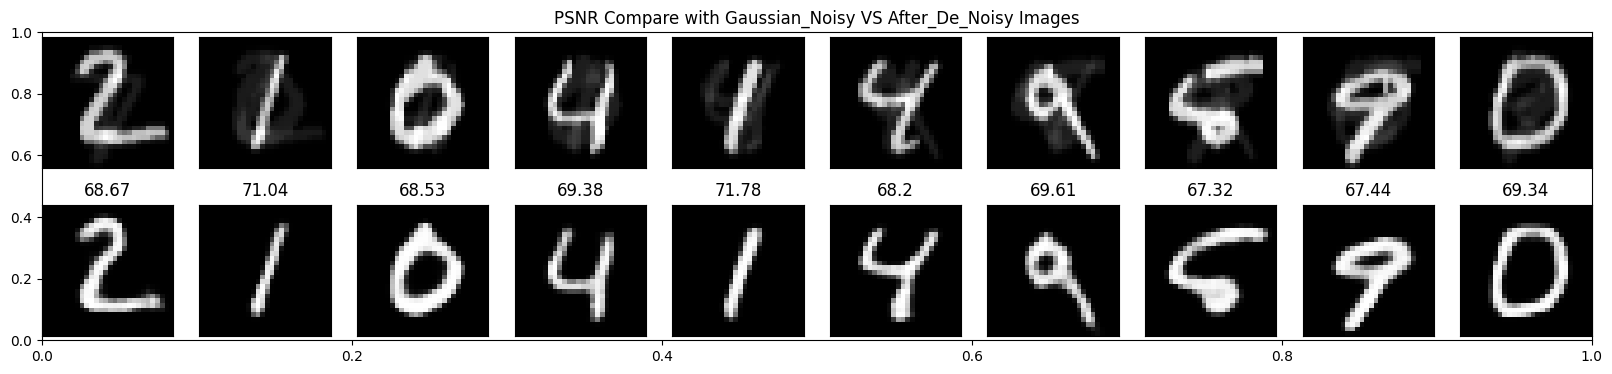

In [ ]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
plt.title("PSNR Compare with Gaussian_Noisy VS After_De_Noisy Images")
for i in range(1, n + 1):
    # Display Gaussian Noise Images
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display Blur Noise Less Images
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)



    plt.title(round(cv2.PSNR(x_test_noisy[i],decoded_imgs[i]),2))
plt.show()

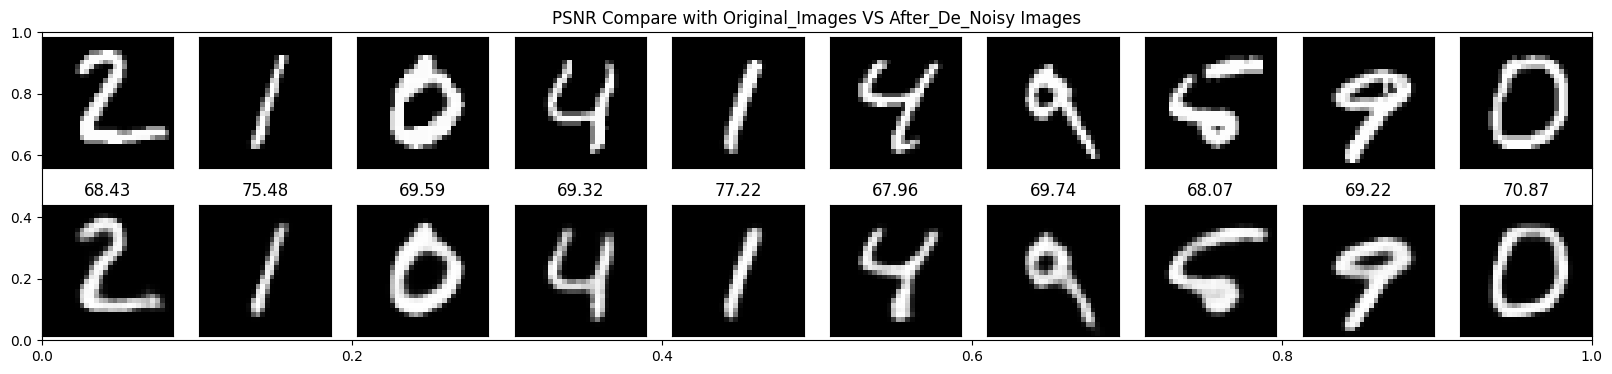

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
plt.title("PSNR Compare with Original_Images VS After_De_Noisy Images")
for i in range(1, n + 1):

    # Original Images
    ax = plt.subplot(2,n,i)
    plt.imshow(x_test[i].reshape(28,-1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    # Display Blur Noise Less Images
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)



    plt.title(round(cv2.PSNR(x_test[i],decoded_imgs[i]),2))
plt.show()

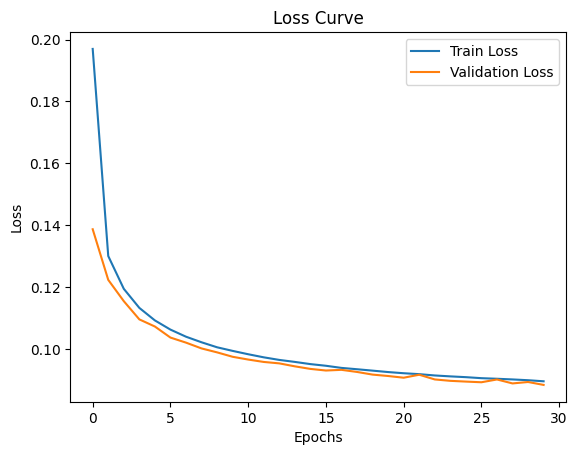

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# PSNR With Original
for i in range(1, n + 1):
  print(cv2.PSNR(x_test_noisy[i],decoded_imgs[i]))

68.50797268192159
70.64284934843066
68.09839327429889
70.26660063622676
71.87929052530906
67.4216702499136
68.80814238740379
66.82549739025967
67.62440743784056
69.52438918392676


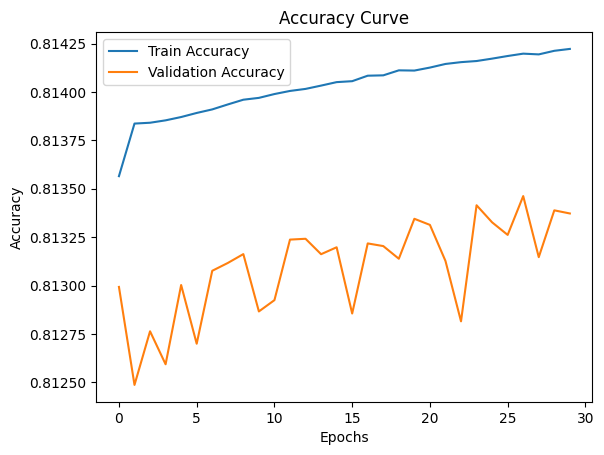

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
